Este analisis tiene como objetivo identificar patrones y similitudes entre pacientes que presentan el Sindrome de Ovario Poliquistico (SOP), y de igual manera entre los pacientes que no presentan este sindrome. Tambien se pretende generar un modelo de prediccion en base a las variables mas relacionadas con este sindrome, obteniendo una prediccion de clasificacion para cualquier paciente que presente los sintomas que a continuacion analizaremos.
La base de datos utilizada para este analisis fue proporcionado por un Clustering Biomedico el cual se espcializa en areas de la salud y tecnologia. Esta base de datos presentan datos de pacientes de los Estados Unidos, lo cuales muestran algunos datos importantes para la prediccion de SOP.

## Importacion de Librerias

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

## Importacion de Datos

In [15]:
df = pd.read_csv('../dataset/PCOS_data.csv')
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


Podemos visualizar las columnas o variables que presenta la base de datos:
Aquí tienes una descripción breve y concisa de cada variable:
### Datos Demográficos y Clínicos

* **PCOS (Y/N):** Variable objetivo. Indica si la paciente tiene diagnóstico de Síndrome de Ovario Poliquístico (Sí/No).
* **Age (yrs):** Edad de la paciente en años.
* **Weight (Kg):** Peso de la paciente en kilogramos.
* **Height(Cm):** Estatura de la paciente en centímetros.
* **BMI:** Índice de Masa Corporal (IMC), calculado a partir del peso y la altura.
* **Blood Group:** Grupo sanguíneo de la paciente (ej. A+, O-).
* **Pulse rate(bpm):** Frecuencia cardíaca (pulsaciones por minuto).
* **RR (breaths/min):** Frecuencia respiratoria (respiraciones por minuto).
* **BP \_Systolic (mmHg):** Presión arterial sistólica (el valor "alto").
* **BP \_Diastolic (mmHg):** Presión arterial diastólica (el valor "bajo").

### Salud Reproductiva e Historial

* **Cycle(R/I):** Indica si el ciclo menstrual es Regular o Irregular.
* **Cycle length(days):** Duración promedio del ciclo menstrual en días.
* **Marraige Status (Yrs):** Duración del matrimonio en años (probablemente usado como indicador de tiempo intentando concebir).
* **Pregnant(Y/N):** Si la paciente está embarazada actualmente (Sí/No).
* **No. of abortions:** Número de abortos previos (espontáneos o inducidos).
* **Follicle No. (L):** Número de folículos contados en el ovario izquierdo (usualmente por ultrasonido).
* **Follicle No. (R):** Número de folículos contados en el ovario derecho.
* **Avg. F size (L) (mm):** Tamaño promedio (en milímetros) de los folículos en el ovario izquierdo.
* **Avg. F size (R) (mm):** Tamaño promedio (en milímetros) de los folículos en el ovario derecho.
* **Endometrium (mm):** Grosor (en milímetros) del endometrio (el revestimiento del útero).

### Análisis de Laboratorio (Hormonas y Sangre)

* **Hb(g/dl):** Nivel de hemoglobina en sangre.
* **I beta-HCG(mIU/mL):** Primer nivel medido de la hormona beta-HCG (hormona del embarazo).
* **II beta-HCG(mIU/mL):** Segundo nivel medido de la beta-HCG (usado para verificar la progresión del embarazo).
* **FSH(mIU/mL):** Nivel de la Hormona Foliculoestimulante (clave en el ciclo ovárico).
* **LH(mIU/mL):** Nivel de la Hormona Luteinizante (clave en la ovulación).
* **FSH/LH:** El ratio o proporción entre los niveles de FSH y LH (relevante para el diagnóstico de SOP).
* **TSH (mIU/L):** Nivel de la Hormona Estimulante de la Tiroides (mide la función tiroidea).
* **AMH(ng/mL):** Nivel de la Hormona Antimülleriana (indicador de la reserva ovárica).
* **PRL(ng/mL):** Nivel de Prolactina (hormona relacionada con la producción de leche).
* **Vit D3 (ng/mL):** Nivel de Vitamina D3 en sangre.
* **PRG(ng/mL):** Nivel de Progesterona (hormona importante en la segunda mitad del ciclo y el embarazo).
* **RBS(mg/dl):** Nivel de glucosa en sangre aleatoria (Random Blood Sugar).

### Síntomas Físicos y Estilo de Vida

* **Hip(inch):** Medida de la circunferencia de la cadera en pulgadas.
* **Waist(inch):** Medida de la circunferencia de la cintura en pulgadas.
* **Waist:Hip Ratio:** Proporción entre la cintura y la cadera (indicador de distribución de grasa).
* **Weight gain(Y/N):** Si la paciente reporta aumento de peso (Sí/No).
* **hair growth(Y/N):** Si la paciente reporta crecimiento excesivo de vello (hirsutismo) (Sí/No).
* **Skin darkening (Y/N):** Si la paciente reporta oscurecimiento de la piel (acantosis nigricans) (Sí/No).
* **Hair loss(Y/N):** Si la paciente reporta caída del cabello (Sí/No).
* **Pimples(Y/N):** Si la paciente reporta tener acné (Sí/No).
* **Fast food (Y/N):** Si la paciente consume comida rápida habitualmente (Sí/No).
* **Reg.Exercise(Y/N):** Si la paciente realiza ejercicio de forma regular (Sí/No).

## Preprocesamiento de Datos

Podemos ver que algunos nombres de las columnas estan en un formato no adecuado. Es necesario tener un formato adecuado.

In [16]:
print(df.shape[1])
for i in df.columns:
    print(i)
# df.columns

42
PCOS (Y/N)
 Age (yrs)
Weight (Kg)
Height(Cm) 
BMI
Blood Group
Pulse rate(bpm) 
RR (breaths/min)
Hb(g/dl)
Cycle(R/I)
Cycle length(days)
Marraige Status (Yrs)
Pregnant(Y/N)
No. of abortions
  I   beta-HCG(mIU/mL)
II    beta-HCG(mIU/mL)
FSH(mIU/mL)
LH(mIU/mL)
FSH/LH
Hip(inch)
Waist(inch)
Waist:Hip Ratio
TSH (mIU/L)
AMH(ng/mL)
PRL(ng/mL)
Vit D3 (ng/mL)
PRG(ng/mL)
RBS(mg/dl)
Weight gain(Y/N)
hair growth(Y/N)
Skin darkening (Y/N)
Hair loss(Y/N)
Pimples(Y/N)
Fast food (Y/N)
Reg.Exercise(Y/N)
BP _Systolic (mmHg)
BP _Diastolic (mmHg)
Follicle No. (L)
Follicle No. (R)
Avg. F size (L) (mm)
Avg. F size (R) (mm)
Endometrium (mm)


Creamos un diccionario para cambiar el nombre de las variables a un nombre mas adecuado.

In [17]:
renamed_columns = {
    'PCOS (Y/N)': 'y',
    ' Age (yrs)': 'Age',
    'Weight (Kg)': 'Weight',
    'Height(Cm) ': 'Height',
    'BMI': 'BMI',
    'Blood Group': 'BloodGroup',
    'Pulse rate(bpm) ': 'PulseRate',
    'RR (breaths/min)': 'RR',
    'Hb(g/dl)': 'Hb',
    'Cycle(R/I)': 'Cycle',
    'Cycle length(days)': 'CycleLength',
    'Marraige Status (Yrs)': 'MarraigeStatus',
    'Pregnant(Y/N)': 'Pregnant',
    'No. of abortions': 'NoAbortions',
    '  I   beta-HCG(mIU/mL)': 'IbetaHCG',
    'II    beta-HCG(mIU/mL)': 'IIbetaHCG',
    'FSH(mIU/mL)': 'FSH',
    'LH(mIU/mL)': 'LH',
    'FSH/LH': 'FSHLH',
    'Hip(inch)': 'Hip',
    'Waist(inch)': 'Waist',
    'Waist:Hip Ratio': 'WaistHipRatio',
    'TSH (mIU/L)': 'TSH',
    'AMH(ng/mL)': 'AMH',
    'PRL(ng/mL)': 'PRL',
    'Vit D3 (ng/mL)': 'VitD3',
    'PRG(ng/mL)': 'PRG',
    'RBS(mg/dl)': 'RBS',
    'Weight gain(Y/N)': 'WeightGain',
    'hair growth(Y/N)': 'HairGrowth',
    'Skin darkening (Y/N)': 'SkinDarkening',
    'Hair loss(Y/N)': 'HairLoss',
    'Pimples(Y/N)': 'Pimples',
    'Fast food (Y/N)': 'FastFood',
    'Reg.Exercise(Y/N)': 'RegExercise',
    'BP _Systolic (mmHg)': 'BPSystolic',
    'BP _Diastolic (mmHg)': 'BPDiastolic',
    'Follicle No. (L)': 'FollicleNoL',
    'Follicle No. (R)': 'FollicleNoR',
    'Avg. F size (L) (mm)': 'AvgFsizeL',
    'Avg. F size (R) (mm)': 'AvgFsizeR',
    'Endometrium (mm)': 'Endometrium'
}
df.rename(columns=renamed_columns, inplace=True)

Podemos observar que todas la variables tienen ya un nombre mas adecuado para implementar modelos, y manteniendo su nombre significativo que identifica cada variable.

Ahora podemos ver que las variables ya se encuentran en su debido tipo de dato a la vez que las variables cualitativas ya se encuentran codificadas, por ende no es necesario hacer ninguna modificacion en los tipos de variables.

Tambien podemos ver que hay algunas columnas las cuales contienen valores nulos (NaN), igual podemos observar que no representan una significante parte de nuestros datos (solo 2 columnas contiene 1 valor nulo), gracias a esto podemos tomar la decision de borrar estos valores en lugar que aplicar otros metodos.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   y               541 non-null    int64  
 1   Age             541 non-null    int64  
 2   Weight          541 non-null    float64
 3   Height          541 non-null    float64
 4   BMI             541 non-null    float64
 5   BloodGroup      541 non-null    int64  
 6   PulseRate       541 non-null    int64  
 7   RR              541 non-null    int64  
 8   Hb              541 non-null    float64
 9   Cycle           541 non-null    int64  
 10  CycleLength     541 non-null    int64  
 11  MarraigeStatus  540 non-null    float64
 12  Pregnant        541 non-null    int64  
 13  NoAbortions     541 non-null    int64  
 14  IbetaHCG        541 non-null    float64
 15  IIbetaHCG       541 non-null    float64
 16  FSH             541 non-null    float64
 17  LH              541 non-null    flo

Borramos los datos nulos de las columnas, las cuales no representan un gran porcentaje de los datos.

In [19]:
df.dropna()

,y,Age,Weight,Height,BMI,BloodGroup,PulseRate,RR,Hb,Cycle,...,Pimples,FastFood,RegExercise,BPSystolic,BPDiastolic,FollicleNoL,FollicleNoR,AvgFsizeL,AvgFsizeR,Endometrium
0,0,28,44.6,152.000,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.5,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.3,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.4,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.2,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


La normalizacion y estandarizacion de los datos se aplica durante el proceso de la craecion del modelo, antes de dividir los datos de entrenamiento y prueba y antes del entrenamiento del modelo. Se realizan los debidos metodos unicamente para las variables numericas que se vallan a utilizar en el modelo.

En nuestro caso, la normalizacion se realizaria para el modelo de clustering (K-NN, K-Means), y la estandarizacion se realizaria para el modelo de regresion logistica.

### Normalizacion

La normalización, o escalado Min-Max, transforma los datos para que queden en un rango específico, generalmente entre 0 y 1. Es la opción preferida en los siguientes casos: 
- **Para algoritmos que calculan distancias**: Los algoritmos como K-Vecinos más Cercanos (k-NN) y las Redes Neuronales que se basan en el cálculo de distancias entre puntos, se ven muy afectados por variables con escalas diferentes. Normalizar los datos asegura que todas las características contribuyan de forma equitativa.
- **Cuando se desconoce la distribución de los datos**: Si no se sabe con certeza si los datos siguen una distribución gaussiana (en forma de campana).
- **Si los datos ya están acotados**: Es útil cuando los datos tienen un rango ya definido y no una distribución particular.
- **Cuando hay valores atípicos que pueden ser importantes**: A diferencia de la estandarización, la normalización es más sensible a los valores atípicos, que pueden comprimir el rango de la mayoría de los datos. 

### Estandarizacion

La estandarización (Z-Score) reajusta la distribución de los datos para que tengan una media de cero y una desviación estándar de uno. Es ideal en las siguientes situaciones: 
- **Para algoritmos que asumen una distribución gaussiana**: Es la mejor opción para modelos como la regresión lineal, la regresión logística y el análisis discriminante lineal (LDA).
- **Cuando se trabaja con valores atípicos**: La estandarización es más resistente a los valores extremos, ya que su cálculo se basa en la media y la desviación estándar, que son menos sensibles a los datos muy alejados.
- **Para el análisis de componentes principales (PCA)**: En este método, es crucial que todas las variables tengan la misma escala para que el resultado sea significativo.
- **Cuando las variables tienen unidades o rangos muy distintos**: Al poner todas las características en una escala común, la estandarización asegura que ninguna variable domine al modelo simplemente por tener una escala mayor. 

In [20]:
# Download cleaned CSV
# df.to_csv('PCOS_data_cleaned.csv', index=False)

## Analisis Exploratorio

Primero observamos cuales son las variables con mas correlacion con la variable objetivo.

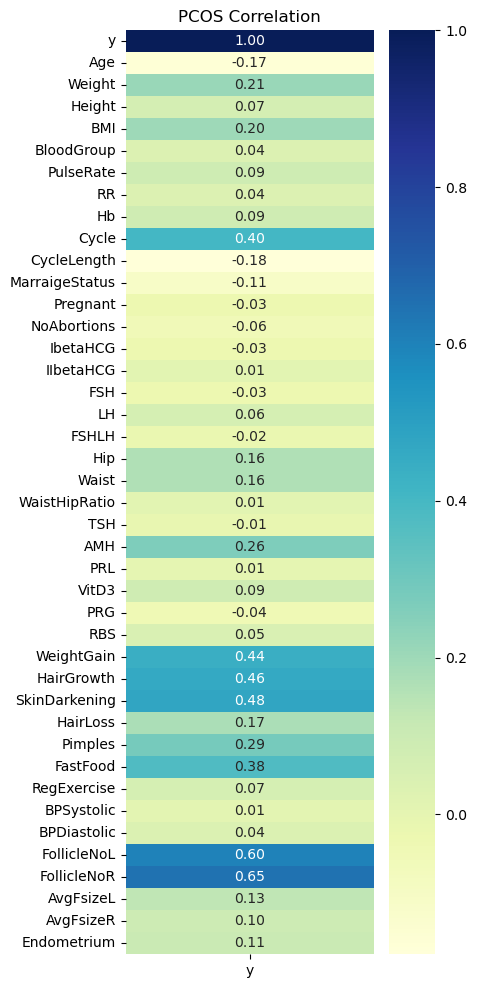

In [21]:
# sns.heatmap(df.corr()['PCOS (Y/N)'], annot=True)
data = df.corr()['y']

plt.figure(figsize=(4, 12))
ax = sns.heatmap(data.to_frame(), annot=True, fmt=".2f", cmap="YlGnBu")

ax.set_title("PCOS Correlation")

plt.show()

Podemos observar que de las 41 variables descriptivas no todas tienen correlacion con la variable objetivo que estamos buscando, entre las variables mas destacables podemos ver:
- FollicleNoR = 0.65
- SkinDarkening = 0.48
- HairGrowth = 0.46
- WeightGain = 0.44
- Cycle = 0.40
- FastFood = 0.38
- Pimples = 0.29
- AMH = 0.26
- Weight = 0.21
- HairLoss = 0.17
- Waist = 0.16
- CycleLenght = -0.18

Detectadas ya las variables descriptivas las cuales tienen mas correlacion con la variable objetivo podemos enfocar el analisis y entrenar los modelos posteriores al analisis con dichas variables presentadas.

In [22]:
X = [
    'FollicleNoR',
    'SkinDarkening',
    'HairGrowth',
    'WeightGain', 
    'Cycle',
    'FastFood',
    'Pimples',
    'AMH',
    'Weight',
    'HairLoss',
    'Waist',
    'CycleLength'
]

Aplicamos los metodos basicos de estadistica descriptiva a las variables numericas no codificadas con mas significancia.

In [30]:
df[['FollicleNoR', 'Cycle', 'AMH', 'Weight', 'Waist', 'CycleLength']].describe()

,FollicleNoR,Cycle,AMH,Weight,Waist,CycleLength
count,541.000000,541.000000,540.000000,541.000000,541.000000,541.00000
mean,6.641405,2.560074,5.624191,59.637153,33.841035,4.94085
std,4.436889,0.901950,5.881608,11.028287,3.596894,1.49202
min,0.000000,2.000000,0.100000,31.000000,24.000000,0.00000
25%,3.000000,2.000000,2.010000,52.000000,32.000000,4.00000
50%,6.000000,2.000000,3.700000,59.000000,34.000000,5.00000
75%,10.000000,4.000000,6.925000,65.000000,36.000000,5.00000
max,20.000000,5.000000,66.000000,108.000000,47.000000,12.00000


El análisis descriptivo de las 541 observaciones muestra una notable variabilidad, especialmente en los marcadores hormonales.
- **Medidas Físicas**: Las variables Weight (Peso) y Waist (Cintura) son consistentes, con medias de 59.6 kg y 33.8, respectivamente, y distribuciones simétricas (media y mediana muy cercanas).
- **Marcadores Clave de SOP**: La variable AMH (Hormona Anti-Mülleriana) es la más extrema. Muestra una enorme dispersión (std de 5.88, mayor que su media de 5.62) y valores máximos (66.0) muy por encima de la mediana (3.70), sugiriendo la presencia de valores atípicos altos.
- **Otros Marcadores**: El número de folículos (FollicleNoR) tiene un promedio de 6.6. La duración del ciclo (CycleLength) está muy concentrada, con la mitad de las pacientes (entre el percentil 25 y 75) presentando valores entre 4.0 y 5.0.

Ahora realizamos una regression lineal simple para ver cuales son las variables descriptivas mas significantes para nuestra variable objetivo.

In [23]:
model_results = []

for x in X:
    var_name = x
    lm = smf.ols(formula='y ~ ' + var_name, data=df).fit()
    
    model_results.append( (var_name, lm.rsquared, lm.rsquared_adj))
    
    print('\n'+'-'*78)
    print('y ~ ' + var_name)
    print('-'*78)
    print(lm.summary())


------------------------------------------------------------------------------
y ~ FollicleNoR
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     390.8
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           7.96e-66
Time:                        13:02:58   Log-Likelihood:                -210.73
No. Observations:                 541   AIC:                             425.5
Df Residuals:                     539   BIC:                             434.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err  

Podemos ver que todas las variables descriptivas tienen un p-valor tienen una relacion estadisticamente significativa con la variable objetivo, teniendo todas un `P>|t|` igual a 0. Esto en parte es bueno ya que ahora sabemos que todas las variables son significativas, pero ahora tenemos que descartar las variables menos significativas usando otro parametro.

In [24]:
model_results.sort(key=lambda item: item[1], reverse=True)

print("Ranking de Modelos por R-squared")
print("\n" + "-"*7)
for var, r2, r2_adj in model_results:
    print(f"Modelo: y ~ {var:<15} | R-cuadrado: {r2:.4f} | R-cuadrado Adj: {r2_adj:.4f}")
print("" + "-"*74)

print("\nModelo con Mejor R-squared")
print("-"*30)
print(f"Variable:   {model_results[0][0]}")
print(f"R-cuadrado: {model_results[0][1]:.4f}")
print("-"*30)

Ranking de Modelos por R-squared

-------
Modelo: y ~ FollicleNoR     | R-cuadrado: 0.4203 | R-cuadrado Adj: 0.4193
Modelo: y ~ SkinDarkening   | R-cuadrado: 0.2263 | R-cuadrado Adj: 0.2249
Modelo: y ~ HairGrowth      | R-cuadrado: 0.2159 | R-cuadrado Adj: 0.2145
Modelo: y ~ WeightGain      | R-cuadrado: 0.1945 | R-cuadrado Adj: 0.1930
Modelo: y ~ Cycle           | R-cuadrado: 0.1613 | R-cuadrado Adj: 0.1598
Modelo: y ~ FastFood        | R-cuadrado: 0.1428 | R-cuadrado Adj: 0.1412
Modelo: y ~ Pimples         | R-cuadrado: 0.0818 | R-cuadrado Adj: 0.0801
Modelo: y ~ AMH             | R-cuadrado: 0.0696 | R-cuadrado Adj: 0.0679
Modelo: y ~ Weight          | R-cuadrado: 0.0449 | R-cuadrado Adj: 0.0431
Modelo: y ~ CycleLength     | R-cuadrado: 0.0319 | R-cuadrado Adj: 0.0301
Modelo: y ~ HairLoss        | R-cuadrado: 0.0299 | R-cuadrado Adj: 0.0281
Modelo: y ~ Waist           | R-cuadrado: 0.0271 | R-cuadrado Adj: 0.0253
----------------------------------------------------------------------

En este caso podemos realizar este descarte utilizando la `R-squared` o la R cuadrada, donde podemos ver que las variables descriptivas con mejor R cuadrada con:
- FollicleNoR
- SkinDarkening
- HairGrowth
- WeightGain
- Cycle

Contamos los valores nulos de las variables descriptivas.

In [34]:
df[X].isnull().sum()

FollicleNoR      0
SkinDarkening    0
HairGrowth       0
WeightGain       0
Cycle            0
FastFood         1
Pimples          0
AMH              1
Weight           0
HairLoss         0
Waist            0
CycleLength      0
dtype: int64

Ahora realizamos un histograma para ver la cantidad de valores de la variable objetivo

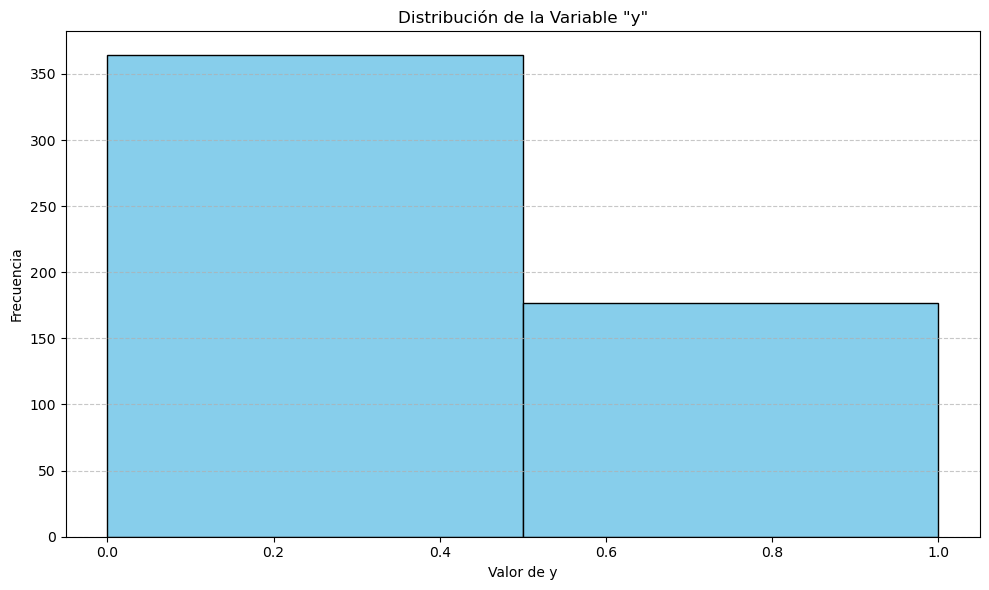

In [40]:
plt.figure(figsize=(10, 6))

plt.hist(df['y'], bins=2, color='skyblue', edgecolor='black')

plt.title('Distribución de la Variable "y"')
plt.xlabel('Valor de y')
plt.ylabel('Frecuencia')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

Podemos visualizar que existe una mayor concentracion de valores en '0' que en '1', con una diferencia muy notable de mas de la mitad de los valores.

## Conclusiones

### Metodología de Selección
Para determinar qué variables eran realmente importantes, realicé una evaluación estadística individual para cada predictor numérico (12 en total) contra nuestra variable objetivo y (la presencia de SOP).

Utilicé la Regresión Lineal Simple (OLS) para este fin, centrándome en dos métricas clave:

Significancia (`P>|t|`): Me aseguré de que las variables seleccionadas tuvieran un p-valor de 0.000 (o < 0.05), lo que confirma que su relación con el SOP no es producto del azar. Todos nuestros predictores principales pasaron este filtro.

Poder Explicativo (`R-squared`): Luego, classifiqué las variables según su R-cuadrado para ver qué porcentaje de la varianza de SOP explicaba cada una.

### Hallazgos: Los Predictores más Fuertes
Este proceso me permitió filtrar y confirmar el siguiente grupo de variables como las más relevantes para la predicción del SOP:

`FollicleNoR` (Número de Folículos): Destacó como el predictor individual más fuerte, con un R-cuadrado de 0.420 (42%).

`AMH` (Hormona Anti-Mülleriana): Esta variable es clave. Noté en las estadísticas descriptivas que tiene una desviación estándar (std 5.88) más alta que su propia media (mean 5.62), lo que indica una enorme variabilidad y la presencia de valores extremos, siendo esto un patrón en sí mismo.

Otros Predictores Significativos: `Cycle` (Ciclo), `Weight` (Peso), `Waist` (Cintura) y `CycleLength` (Duración del Ciclo) también mostraron una relación estadística fuerte y significativa.

### Siguientes Pasos
El próximo paso será tomar este grupo validado de predictores y usarlos para entrenar un modelo de clasificación (como Regresión Logística y Random Forest), que están diseñados específicamente para predecir un resultado de "Sí" o "No" como el nuestro.